In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\Raju A S\\Desktop\\python\\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

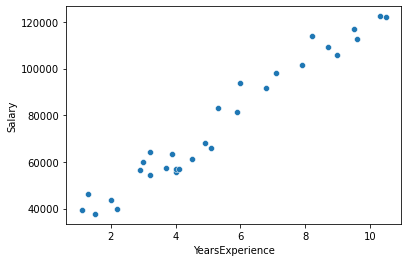

In [3]:
sns.scatterplot(x=data.YearsExperience, y=data.Salary)

In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [5]:
x = np.array(data["YearsExperience"]).reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (30, 1)


In [6]:
y = np.array(data["Salary"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (30, 1)


In [7]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
print("Length of X_Train : ",len(x_train))
print("Length of Y_Train : ",len(y_train))
print("Length of X_Test : ",len(x_test))
print("Length of Y_Test : ",len(y_test))

Length of X_Train :  24
Length of Y_Train :  24
Length of X_Test :  6
Length of Y_Test :  6


In [9]:
x_test

array([[4. ],
       [7.1],
       [7.9],
       [3.9],
       [8.2],
       [6.8]])

In [10]:
y_test

array([[ 55794.],
       [ 98273.],
       [101302.],
       [ 63218.],
       [113812.],
       [ 91738.]])

In [11]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:

model.score(x_test,y_test)

0.9036331530412597

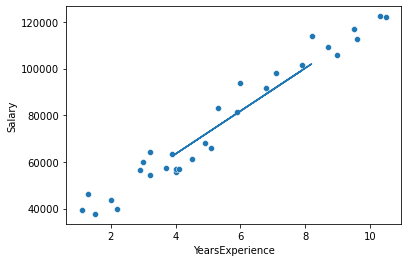

In [13]:
sns.scatterplot(x=data.YearsExperience, y=data.Salary)
plt.plot(x_test,model.predict(x_test))
plt.show()

In [14]:
model.coef_

array([[9175.83572335]])

In [15]:
model.intercept_

array([26712.03998389])

In [16]:
y_predict = np.round(model.predict(x_test),2)
y_predict[0:,0]

array([ 63415.38,  91860.47,  99201.14,  62497.8 , 101953.89,  89107.72])

In [17]:
x_test[0:,0]

array([4. , 7.1, 7.9, 3.9, 8.2, 6.8])

In [18]:
y_test[0:,0]

array([ 55794.,  98273., 101302.,  63218., 113812.,  91738.])

In [20]:
data_1 = {"Test_YearsExperience" : x_test[0:,0], "Actual_Salary" : y_test[0:,0], "Predicted_Salary" : y_predict[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Raju A S\\Desktop\\python\\Salary_Data.csv") 
data_1.head()

,Test_YearsExperience,Actual_Salary,Predicted_Salary
0,4.0,55794.0,63415.38
1,7.1,98273.0,91860.47
2,7.9,101302.0,99201.14
3,3.9,63218.0,62497.80
4,8.2,113812.0,101953.89


In [21]:
import statsmodels.formula.api as smf

In [22]:
linear_model = smf.ols("y~x", data=data).fit()

In [23]:

linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [24]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        22:38:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""